# Read CSV file using pandas

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth',100)

# Reading CSV File
data = pd.read_csv (r'Reviews.csv')

#Selected colums
data = data[['reviews.rating' , 'reviews.text' , 'reviews.title']]
data.head()

,reviews.rating,reviews.text,reviews.title
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here


# NLP Implementation

# Remove punctuation from the text

In [5]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
#Defining function
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [7]:
data['reviews.text_clean'] = data['reviews.text'].apply(lambda x: remove_punctuation(x))
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.text_clean
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel,This hotel was nice and quiet Did not know there was train track near by But it was only few tra...
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separation between the bedroom and the living space The sof...
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business,Parking was horrible somebody ran into my rental car while staying there I didnt get to try the ...
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good,Not cheap but excellent location Price is somewhat standard for not hacing reservations But room...
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here,If you get the room that they advertised on the website and for what you paid you may be luckyIf...


In [8]:
data.to_csv('Reviewsclean.csv')

# Tokenization

In [9]:
import re

def tokenize(txt):
    tokens = re.split('\W+' , txt)
    return tokens

data['reviews.text_clean_tokenized'] = data['reviews.text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.text_clean,reviews.text_clean_tokenized
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel,This hotel was nice and quiet Did not know there was train track near by But it was only few tra...,"[this, hotel, was, nice, and, quiet, did, not, know, there, was, train, track, near, by, but, it..."
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separation between the bedroom and the living space The sof...,"[we, stayed, in, the, king, suite, with, the, separation, between, the, bedroom, and, the, livin..."
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business,Parking was horrible somebody ran into my rental car while staying there I didnt get to try the ...,"[parking, was, horrible, somebody, ran, into, my, rental, car, while, staying, there, i, didnt, ..."
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good,Not cheap but excellent location Price is somewhat standard for not hacing reservations But room...,"[not, cheap, but, excellent, location, price, is, somewhat, standard, for, not, hacing, reservat..."
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here,If you get the room that they advertised on the website and for what you paid you may be luckyIf...,"[if, you, get, the, room, that, they, advertised, on, the, website, and, for, what, you, paid, y..."


In [10]:
data.to_csv('Reviewstokenized.csv')

# Removing Stopwords

In [11]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
#Defining function
def remove_stopwords(txt_tokenized):
    txt_clean  = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

data['reviews.text_no_sw'] = data['reviews.text_clean_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.text_clean,reviews.text_clean_tokenized,reviews.text_no_sw
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel,This hotel was nice and quiet Did not know there was train track near by But it was only few tra...,"[this, hotel, was, nice, and, quiet, did, not, know, there, was, train, track, near, by, but, it...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote..."
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separation between the bedroom and the living space The sof...,"[we, stayed, in, the, king, suite, with, the, separation, between, the, bedroom, and, the, livin...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo..."
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business,Parking was horrible somebody ran into my rental car while staying there I didnt get to try the ...,"[parking, was, horrible, somebody, ran, into, my, rental, car, while, staying, there, i, didnt, ...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r..."
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good,Not cheap but excellent location Price is somewhat standard for not hacing reservations But room...,"[not, cheap, but, excellent, location, price, is, somewhat, standard, for, not, hacing, reservat...","[cheap, excellent, location, price, somewhat, standard, hacing, reservations, room, nice, clean,..."
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here,If you get the room that they advertised on the website and for what you paid you may be luckyIf...,"[if, you, get, the, room, that, they, advertised, on, the, website, and, for, what, you, paid, y...","[get, room, advertised, website, paid, may, luckyif, stay, many, days, give, good, roomsnobody, ..."


# Clear Data

In [13]:
def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [14]:
data['reviews.text_no_sw'] = data['reviews.text'].apply(lambda x: clean_text(x.lower()))
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.text_clean,reviews.text_clean_tokenized,reviews.text_no_sw
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel,This hotel was nice and quiet Did not know there was train track near by But it was only few tra...,"[this, hotel, was, nice, and, quiet, did, not, know, there, was, train, track, near, by, but, it...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote..."
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separation between the bedroom and the living space The sof...,"[we, stayed, in, the, king, suite, with, the, separation, between, the, bedroom, and, the, livin...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo..."
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business,Parking was horrible somebody ran into my rental car while staying there I didnt get to try the ...,"[parking, was, horrible, somebody, ran, into, my, rental, car, while, staying, there, i, didnt, ...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r..."
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good,Not cheap but excellent location Price is somewhat standard for not hacing reservations But room...,"[not, cheap, but, excellent, location, price, is, somewhat, standard, for, not, hacing, reservat...","[cheap, excellent, location, price, somewhat, standard, hacing, reservations, room, nice, clean,..."
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here,If you get the room that they advertised on the website and for what you paid you may be luckyIf...,"[if, you, get, the, room, that, they, advertised, on, the, website, and, for, what, you, paid, y...","[get, room, advertised, website, paid, may, luckyif, stay, many, days, give, good, roomsnobody, ..."


In [15]:
data.to_csv('ReviewsNostopwords.csv')

# NLTK implementation

In [16]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [17]:
def stemming(tokenized_text): 
    text = [ps.stem(word) for word in tokenized_text]
    return text
data['reviews.text_stemmed'] = data['reviews.text_no_sw'].apply(lambda x: stemming(x))
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.text_clean,reviews.text_clean_tokenized,reviews.text_no_sw,reviews.text_stemmed
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel,This hotel was nice and quiet Did not know there was train track near by But it was only few tra...,"[this, hotel, was, nice, and, quiet, did, not, know, there, was, train, track, near, by, but, it...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote...","[hotel, nice, quiet, know, train, track, near, train, pass, stay, best, western, chang, hotel, c..."
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separation between the bedroom and the living space The sof...,"[we, stayed, in, the, king, suite, with, the, separation, between, the, bedroom, and, the, livin...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo...","[stay, king, suit, separ, bedroom, live, space, sofa, bed, wasnt, good, back, discomfort, day, l..."
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business,Parking was horrible somebody ran into my rental car while staying there I didnt get to try the ...,"[parking, was, horrible, somebody, ran, into, my, rental, car, while, staying, there, i, didnt, ...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r...","[park, horribl, somebodi, ran, rental, car, stay, didnt, get, tri, breakfast, busi, restaur, ope..."
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good,Not cheap but excellent location Price is somewhat standard for not hacing reservations But room...,"[not, cheap, but, excellent, location, price, is, somewhat, standard, for, not, hacing, reservat...","[cheap, excellent, location, price, somewhat, standard, hacing, reservations, room, nice, clean,...","[cheap, excel, locat, price, somewhat, standard, hace, reserv, room, nice, clean, offer, good, c..."
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here,If you get the room that they advertised on the website and for what you paid you may be luckyIf...,"[if, you, get, the, room, that, they, advertised, on, the, website, and, for, what, you, paid, y...","[get, room, advertised, website, paid, may, luckyif, stay, many, days, give, good, roomsnobody, ...","[get, room, advertis, websit, paid, may, luckyif, stay, mani, day, give, good, roomsnobodi, want..."


# Wordnet

In [18]:
import nltk
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

# lemmatization

In [21]:
#defining function
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [22]:
data['reviews.text_lemmatized'] = data['reviews.text_no_sw'].apply(lambda x: lemmatization(x))
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.text_clean,reviews.text_clean_tokenized,reviews.text_no_sw,reviews.text_stemmed,reviews.text_lemmatized
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel,This hotel was nice and quiet Did not know there was train track near by But it was only few tra...,"[this, hotel, was, nice, and, quiet, did, not, know, there, was, train, track, near, by, but, it...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote...","[hotel, nice, quiet, know, train, track, near, train, pass, stay, best, western, chang, hotel, c...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote..."
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separation between the bedroom and the living space The sof...,"[we, stayed, in, the, king, suite, with, the, separation, between, the, bedroom, and, the, livin...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo...","[stay, king, suit, separ, bedroom, live, space, sofa, bed, wasnt, good, back, discomfort, day, l...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo..."
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business,Parking was horrible somebody ran into my rental car while staying there I didnt get to try the ...,"[parking, was, horrible, somebody, ran, into, my, rental, car, while, staying, there, i, didnt, ...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r...","[park, horribl, somebodi, ran, rental, car, stay, didnt, get, tri, breakfast, busi, restaur, ope...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r..."
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good,Not cheap but excellent location Price is somewhat standard for not hacing reservations But room...,"[not, cheap, but, excellent, location, price, is, somewhat, standard, for, not, hacing, reservat...","[cheap, excellent, location, price, somewhat, standard, hacing, reservations, room, nice, clean,...","[cheap, excel, locat, price, somewhat, standard, hace, reserv, room, nice, clean, offer, good, c...","[cheap, excellent, location, price, somewhat, standard, hacing, reservation, room, nice, clean, ..."
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here,If you get the room that they advertised on the website and for what you paid you may be luckyIf...,"[if, you, get, the, room, that, they, advertised, on, the, website, and, for, what, you, paid, y...","[get, room, advertised, website, paid, may, luckyif, stay, many, days, give, good, roomsnobody, ...","[get, room, advertis, websit, paid, may, luckyif, stay, mani, day, give, good, roomsnobodi, want...","[get, room, advertised, website, paid, may, luckyif, stay, many, day, give, good, roomsnobody, w..."


In [23]:
data.to_csv('Reviewsstemming.csv')

# Feature Engineering

In [24]:
import string 
def punctuation_count(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

data['punctuation_%'] = data['reviews.text'].apply(lambda x: punctuation_count(x))
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.text_clean,reviews.text_clean_tokenized,reviews.text_no_sw,reviews.text_stemmed,reviews.text_lemmatized,punctuation_%
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel,This hotel was nice and quiet Did not know there was train track near by But it was only few tra...,"[this, hotel, was, nice, and, quiet, did, not, know, there, was, train, track, near, by, but, it...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote...","[hotel, nice, quiet, know, train, track, near, train, pass, stay, best, western, chang, hotel, c...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote...",2.803738
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separation between the bedroom and the living space The sof...,"[we, stayed, in, the, king, suite, with, the, separation, between, the, bedroom, and, the, livin...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo...","[stay, king, suit, separ, bedroom, live, space, sofa, bed, wasnt, good, back, discomfort, day, l...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo...",2.461538
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business,Parking was horrible somebody ran into my rental car while staying there I didnt get to try the ...,"[parking, was, horrible, somebody, ran, into, my, rental, car, while, staying, there, i, didnt, ...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r...","[park, horribl, somebodi, ran, rental, car, stay, didnt, get, tri, breakfast, busi, restaur, ope...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r...",2.430556
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good,Not cheap but excellent location Price is somewhat standard for not hacing reservations But room...,"[not, cheap, but, excellent, location, price, is, somewhat, standard, for, not, hacing, reservat...","[cheap, excellent, location, price, somewhat, standard, hacing, reservations, room, nice, clean,...","[cheap, excel, locat, price, somewhat, standard, hace, reserv, room, nice, clean, offer, good, c...","[cheap, excellent, location, price, somewhat, standard, hacing, reservation, room, nice, clean, ...",2.580645
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here,If you get the room that they advertised on the website and for what you paid you may be luckyIf...,"[if, you, get, the, room, that, they, advertised, on, the, website, and, for, what, you, paid, y...","[get, room, advertised, website, paid, may, luckyif, stay, many, days, give, good, roomsnobody, ...","[get, room, advertis, websit, paid, may, luckyif, stay, mani, day, give, good, roomsnobodi, want...","[get, room, advertised, website, paid, may, luckyif, stay, many, day, give, good, roomsnobody, w...",4.531722


# Sentimental Analysis

In [25]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["reviews.text"].apply(lambda x: sid.polarity_scores(x))
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)


In [26]:
# add number of characters column
data["R_chars"] = data["reviews.text"].apply(lambda x: len(x))

# add number of words column
data["R_words"] = data["reviews.text"].apply(lambda x: len(x.split(" ")))

In [27]:
# highest positive sentiment reviews (with more than 5 words)
data[data["R_words"] >= 5].sort_values("pos", ascending = False)[["reviews.text", "pos"]].head(10)

,reviews.text,pos
9642,Great Hotel. Clean and comfortable. Excellent value. Great location. No extra fees and free park...,0.622
5185,"Wow Very clean, awesome pool, awesome breakfast. Very nice clean rooms. Breakfast had so many ch...",0.609
8823,"Wonderful staff, friendly and helpful. Accommodated early check in. Beautiful room, clean and sa...",0.602
7254,This hotel is perfectly located on busy Duval Street. It is also perfectly quiet. The staff is p...,0.592
5199,"awesome place, we were gladly surprise, staff was nice and friendly, the room was perfect, super...",0.590
9734,The staff was so nice and helpful. The rooms were great and very clean!,0.584
1975,"The staff was very friendly and truly made my stay great. Great, family owned business!",0.579
7285,Beautiful hotel. The staff was friendly and helpful. Relaxing poolside space. The rooms were spa...,0.579
5770,"Excellent Resort. Beautiful location, Ambience, Impeccable service, clean rooms, free Internet a...",0.576
5413,Great place to stay very comfortable . All employees very friendly . Breakfast was great and eve...,0.566


In [28]:
# lowest negative sentiment reviews (with more than 5 words)
data[data["R_words"] >= 5].sort_values("neg", ascending = False)[["reviews.text", "neg"]].head(10)

,reviews.text,neg
3636,The staff here is horrible and the manager sucks!! The hotel was dirty and the bathrooms were di...,0.392
6977,"The pictures were dirty with brown stuff, the beds were awful, toliet, tub, sink were all dirty,...",0.375
4132,"Infected of fleas and thumbtacks, bedbags infected. The people of receipt know the problem and n...",0.358
6591,Very upset with my stay at this hotel. Room is nice but staff is extremely rude and incompetent....,0.343
2334,"There is no fridge, no microwave, no hanger. The safe isn't work. My trip was a disaster they do...",0.336
4984,Room was smelly and dark Bathroom was shocking was not that clean Furniture was of poor quality ...,0.331
8718,"Employees rude, not helpful. Drugs run amuck here. permanent residents are evil, carry guns, sel...",0.329
2269,The hotel is very rundown. I was very disappointed. The mattresses were terrible you could feel ...,0.317
4481,"Ice machine broken, telephone broken, ice bucket dirty, run down hotel, overall stinky ordor, gr...",0.316
3876,Rude clerk at check in. After a long wait! Room had terrible smell. Room had no soap. Ov erall r...,0.310


In [29]:
data['sentiment'] = data['reviews.text'].apply(lambda x: sid.polarity_scores(x))
def convert(x):
    if x < 0:
        return "negative"
    elif x > .2:
        return "positive"
    else:
        return "neutral"
data['result'] = data['sentiment'].apply(lambda x:convert(x['compound']))

In [30]:
data.to_csv('Senitmentalanalysis.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   reviews.rating                10000 non-null  int64  
 1   reviews.text                  10000 non-null  object 
 2   reviews.title                 9999 non-null   object 
 3   reviews.text_clean            10000 non-null  object 
 4   reviews.text_clean_tokenized  10000 non-null  object 
 5   reviews.text_no_sw            10000 non-null  object 
 6   reviews.text_stemmed          10000 non-null  object 
 7   reviews.text_lemmatized       10000 non-null  object 
 8   punctuation_%                 10000 non-null  float64
 9   neg                           10000 non-null  float64
 10  neu                           10000 non-null  float64
 11  pos                           10000 non-null  float64
 12  compound                      10000 non-null  float64
 13  R_

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data.sentiment.value_counts()


TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}             74
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.9184}         4
{'neg': 0.054, 'neu': 0.815, 'pos': 0.131, 'compound': 0.9945}     4
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.6369}       3
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9868}       3
                                                                  ..
{'neg': 0.049, 'neu': 0.699, 'pos': 0.252, 'compound': 0.9684}     1
{'neg': 0.042, 'neu': 0.706, 'pos': 0.252, 'compound': 0.997}      1
{'neg': 0.008, 'neu': 0.714, 'pos': 0.278, 'compound': 0.9902}     1
{'neg': 0.073, 'neu': 0.535, 'pos': 0.391, 'compound': 0.9629}     1
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.9023}       1
Name: sentiment, Length: 9610, dtype: int64

# Sentimental Analysis of ratings

In [33]:
sentiment_count=data.groupby('sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['reviews.text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()


TypeError: unhashable type: 'dict'

In [ ]:
data.columns

#Density plot of positive and negative reviews

C:\Users\hitar\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\hitar\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hitar\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\hitar\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


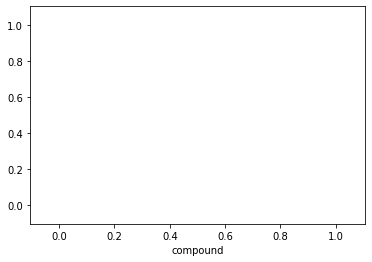

In [81]:
import seaborn as sns

for x in [1, 5]:
    subset = data[data['sentiment'] == x]
    
    # Draw the density plot
    if x == 5:
        label = "positive reviews"
    else:
        label = "Negative reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

# TF-IDF Vector 

In [36]:
#Method1

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer()

cv1 = CountVectorizer(analyzer=clean_text)

X = cv1.fit_transform(data['reviews.text'])
print(X.shape)
#print(tfidf_vect.vocabulary_.keys())


(10000, 36541)


In [37]:
print(cv1.get_feature_names())

['', '0', '0014', '0020', '007traveler64Thank', '0100', '0110', '02', '0200', '03', '040608', '05', '0500', '0509Nov', '0530', '06', '07', '0700', '0800', '0800Miscellaneous', '081417', '0815', '08Mar', '091115', '092115', '09302016', '0930Probably', '0Thank', '1', '10', '100', '1000', '10000', '1000am', '1000amwe', '1000night', '1000pm', '1001', '100110', '1006', '100AM', '100Evi', '100MoreDear', '100Thank', '100am', '100easy', '100ft', '100king', '100m', '100night', '100s', '101', '1010', '1012', '1015', '1015mins', '1015pm', '1018', '102', '102210272017', '1025', '1029', '103', '1030', '1030PM', '1030am', '1030pm', '1035am', '104', '1045', '1045pm', '104lawandar', '105', '1050', '1054', '106', '107', '107night', '10800', '109', '109135', '1095', '1099', '109Thanks', '109night', '109tax', '10AM', '10Below', '10K', '10My', '10Noise', '10PM', '10PMAll', '10Southern', '10Were', '10am', '10day', '10ish', '10k', '10lb', '10mbs', '10metres', '10min', '10minute', '10night', '10nigth', '10pm

In [38]:
data_sample = data[0:10]
tfidf2 = TfidfVectorizer(analyzer=clean_text)
X = tfidf2.fit_transform(data_sample['reviews.text'])
print(X.shape)


(10, 214)


In [39]:
#dataframe for tf-idf
df = pd.DataFrame(X.toarray(), columns=tfidf2.get_feature_names())
df.head(10)

,10,2,50,AC,And,Best,But,Carmel,Did,Everything,...,wasnt,water,website,week,within,workout,world,worst,would,yard
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.221077,0.187936,0.000000,0.221077,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.170103,0.000000,0.000000,0.000000,0.170103,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.184577,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184577,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.179094,0.000000,0.000000,0.152246,0.179094,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.159316,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.179123,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.167328,0.334656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167328,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.167328,0.000000,0.00000,0.167328,0.000000
7,0.000000,0.000000,0.206007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.206007,0.000000,0.000000,0.000000,0.00000,0.000000,0.206007
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.15663,0.000000,0.000000


In [40]:
data.to_csv('Reviewsnlptrain.csv')

In [41]:
data.isnull().sum()


reviews.rating                  0
reviews.text                    0
reviews.title                   1
reviews.text_clean              0
reviews.text_clean_tokenized    0
reviews.text_no_sw              0
reviews.text_stemmed            0
reviews.text_lemmatized         0
punctuation_%                   0
neg                             0
neu                             0
pos                             0
compound                        0
R_chars                         0
R_words                         0
sentiment                       0
result                          0
dtype: int64

# Wordtovector

In [42]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data["reviews.text_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = data["reviews.text_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
data = pd.concat([data, doc2vec_df], axis=1)

In [43]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(data["reviews.text_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index =data.index
data = pd.concat([data, tfidf_df], axis=1)

In [44]:
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.text_clean,reviews.text_clean_tokenized,reviews.text_no_sw,reviews.text_stemmed,reviews.text_lemmatized,punctuation_%,neg,...,word_yours,word_yoursandrew,word_yourself,word_youve,word_yr,word_yummy,word_zaza,word_zephyr,word_zero,word_zoo
0,3,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few ...",Best Western Plus Hotel,This hotel was nice and quiet Did not know there was train track near by But it was only few tra...,"[this, hotel, was, nice, and, quiet, did, not, know, there, was, train, track, near, by, but, it...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote...","[hotel, nice, quiet, know, train, track, near, train, pass, stay, best, western, chang, hotel, c...","[hotel, nice, quiet, know, train, track, near, train, passed, stay, best, western, changed, hote...",2.803738,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,We stayed in the king suite with the separation between the bedroom and the living space. The so...,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separation between the bedroom and the living space The sof...,"[we, stayed, in, the, king, suite, with, the, separation, between, the, bedroom, and, the, livin...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo...","[stay, king, suit, separ, bedroom, live, space, sofa, bed, wasnt, good, back, discomfort, day, l...","[stayed, king, suite, separation, bedroom, living, space, sofa, bed, wasnt, good, back, discomfo...",2.461538,0.080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try t...",Business,Parking was horrible somebody ran into my rental car while staying there I didnt get to try the ...,"[parking, was, horrible, somebody, ran, into, my, rental, car, while, staying, there, i, didnt, ...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r...","[park, horribl, somebodi, ran, rental, car, stay, didnt, get, tri, breakfast, busi, restaur, ope...","[parking, horrible, somebody, ran, rental, car, staying, didnt, get, try, breakfast, business, r...",2.430556,0.063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But ro...,Very good,Not cheap but excellent location Price is somewhat standard for not hacing reservations But room...,"[not, cheap, but, excellent, location, price, is, somewhat, standard, for, not, hacing, reservat...","[cheap, excellent, location, price, somewhat, standard, hacing, reservations, room, nice, clean,...","[cheap, excel, locat, price, somewhat, standard, hace, reserv, room, nice, clean, offer, good, c...","[cheap, excellent, location, price, somewhat, standard, hacing, reservation, room, nice, clean, ...",2.580645,0.159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,"If you get the room that they advertised on the website and for what you paid, you may be lucky....",Low chance to come back here,If you get the room that they advertised on the website and for what you paid you may be luckyIf...,"[if, you, get, the, room, that, they, advertised, on, the, website, and, for, what, you, paid, y...","[get, room, advertised, website, paid, may, luckyif, stay, many, days, give, good, roomsnobody, ...","[get, room, advertis, websit, paid, may, luckyif, stay, mani, day, give, good, roomsnobodi, want...","[get, room, advertised, website, paid, may, luckyif, stay, many, day, give, good, roomsnobody, w...",4.531722,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# show sentiment distribution
data["reviews.text"].value_counts(normalize = True)

MoreMore                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                0.0018
We thoroughly enjoyed our stay. We were in contact with the hotel staff throughout the time before our stay for a family wedding, and the staff did everything they could to make our stay special, enjoyable, and comfortable. From impeccably cleaned rooms, turndown service, and...More                                                                                                                                                                                                             0.0002
From the p

In [46]:
# show sentiment distribution
#data["sentiment"].value_counts(normalize = True)

# word cloud of hotel reviews(clean data)

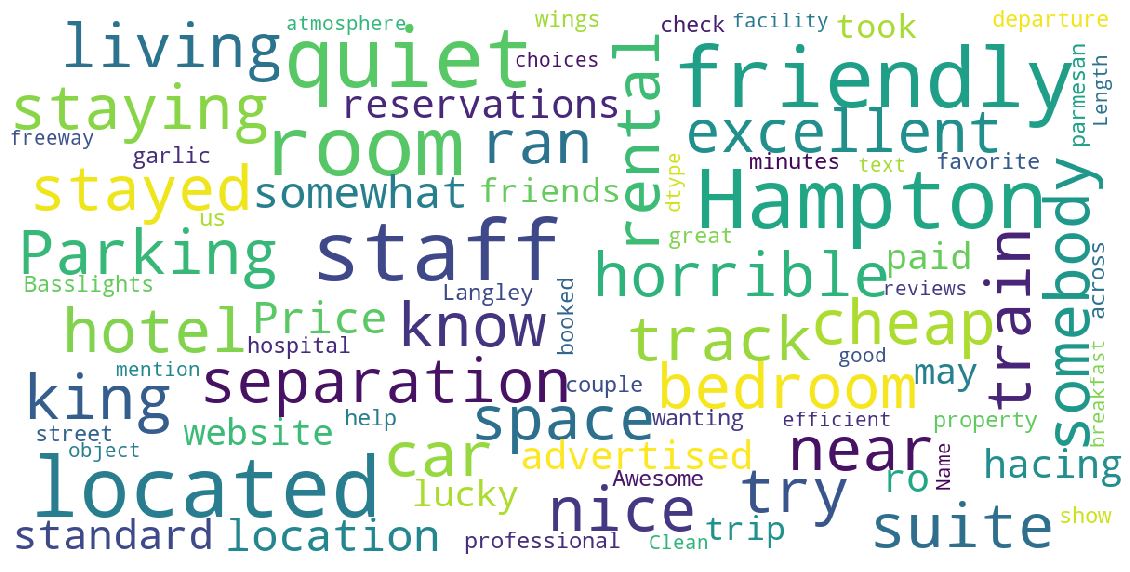

In [47]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 30, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
from tqdm import tqdm
show_wordcloud(data["reviews.text"])

# naivy bayes model used for check accuracy

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['reviews.text'])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['reviews.rating'], test_size=0.3, random_state=1)

In [58]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5933333333333334


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['reviews.text'])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['reviews.rating'], test_size=0.3, random_state=123)

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.48966666666666664


# classification model for train and test data

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(data[['reviews.text', 'punctuation_%']], data['result'], test_size=0.2)

In [77]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['reviews.text'])

tfidf_train = tfidf_vect_fit.transform(X_train['reviews.text'])
tfidf_test = tfidf_vect_fit.transform(X_test['reviews.text'])

X_train_vect = pd.concat([X_train[['punctuation_%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['punctuation_%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,punctuation_%,0,1,2,3,4,5,6,7,8,...,31971,31972,31973,31974,31975,31976,31977,31978,31979,31980
0,2.592593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.896067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.668211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.862986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.606557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
Reviewdata = CountVectorizer(analyzer=clean_text).fit_transform(data['reviews.text'])

In [79]:
#Split the data into 80% training (X_train & y_train) and 20% testing (X_test & y_test) data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Reviewdata, data['reviews.rating'], test_size = 0.20, random_state = 0)

In [80]:
Reviewdata.shape


(10000, 36541)

In [67]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
#Print the predictions
print(classifier.predict(X_train))

#Print the actual values
print(y_train.values)

[5 5 4 ... 4 5 1]
[5 5 4 ... 4 5 1]


In [69]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           1       0.92      0.72      0.81       464
           2       0.98      0.37      0.53       443
           3       0.73      0.54      0.63       929
           4       0.73      0.73      0.73      2262
           5       0.82      0.95      0.88      3902

    accuracy                           0.80      8000
   macro avg       0.84      0.66      0.72      8000
weighted avg       0.80      0.80      0.79      8000

Confusion Matrix: 
 [[ 334    0   60   48   22]
 [  13  162  106  114   48]
 [   3    0  506  287  133]
 [   4    1    8 1647  602]
 [   8    2    9  162 3721]]

Accuracy:  0.79625


In [70]:
#Print the predictions
print('Predicted value: ',classifier.predict(X_test))

#Print Actual Label
print('Actual value: ',y_test.values)

Predicted value:  [5 5 4 ... 5 5 5]
Actual value:  [5 4 4 ... 5 5 5]


In [71]:
#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))

print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           1       0.70      0.41      0.52       103
           2       0.38      0.03      0.05       111
           3       0.33      0.20      0.25       261
           4       0.47      0.46      0.47       587
           5       0.69      0.88      0.77       938

    accuracy                           0.60      2000
   macro avg       0.51      0.40      0.41      2000
weighted avg       0.56      0.60      0.56      2000

Confusion Matrix: 
 [[ 42   1  38  15   7]
 [ 13   3  50  34  11]
 [  1   1  53 151  55]
 [  1   2  14 272 298]
 [  3   1   4 105 825]]

Accuracy:  0.5975


# Naive bayes model for reviews testing

In [72]:
from sklearn.naive_bayes import MultinomialNB
reviews_recommended = MultinomialNB().fit(tfidf_result, data['result'])


In [73]:
print('expected:', reviews_recommended.predict(tfidf_result)[4])
print('recommended:', data.result[3])

expected: positive
recommended: positive


In [74]:
all_predictions = reviews_recommended.predict(tfidf_result)
print(all_predictions)

['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']


In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(data['result'], all_predictions))
print('\n')
m_confusion_test = confusion_matrix(data['result'], all_predictions)
pd.DataFrame(data = m_confusion_test, columns = ['Predicted positive', 'Predicted negative' , 'Predicted neutral'],
            index = ['Actual positive', 'Actual Negavtive' , 'Actual neutral'])

              precision    recall  f1-score   support

    negative       0.92      0.08      0.15       685
     neutral       0.91      0.12      0.21       180
    positive       0.92      1.00      0.96      9135

    accuracy                           0.92     10000
   macro avg       0.92      0.40      0.44     10000
weighted avg       0.92      0.92      0.89     10000





,Predicted positive,Predicted negative,Predicted neutral
Actual positive,54,1,630
Actual Negavtive,1,21,158
Actual neutral,4,1,9130
